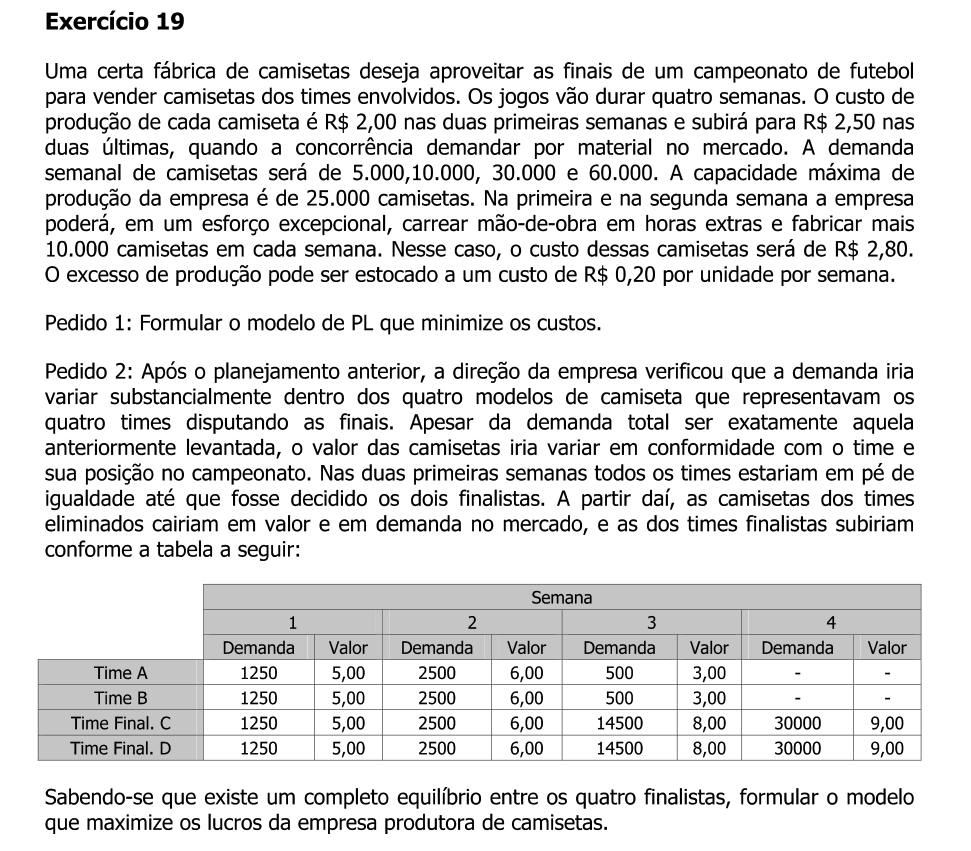

## Modelo 1

### Índice / Conjunto

$J \colon \text{Conjunto de semanas, }J=\{1,2, \ldots, n\}.$

### Parâmetros

$d_j \colon \text{Demanda na semana }j \in J,$

$a_j \colon \text{Custo unitário de produção em horas normais na semana }j \in J,$

$b_j \colon \text{Custo unitário de produção em horas extras na semana }j \in J,$

$c_j \colon \text{Custo unitário de estoque na semana }j \in J,$

$h_j \colon \text{Capacidade máxima de fabricação em horas extras na semana }j \in J,$

$L \colon \text{Capacidade máxima de fabricação por semana em horas normais}.$

### Variáveis de decisão

$x_j \colon \text{Quantidade de camisetas produzidas em horas normais na semana }j \in J,$

$y_j \colon \text{Quantidade de camisetas produzidas em horas extras na semana }j \in J,$

$w_j \colon \text{Quantidade de camisetas estocadas no início da semana }j \in J.$


### Formulação matemática

$\text{min }z = \sum\limits_{j \in J} a_j x_j + \sum\limits_{j \in J} b_j y_j + \sum\limits_{j \in J} c_j w_j$

sujeito a

$x_j \leq L, \;\; \forall j \in J,$

$y_j \leq h_j, \;\; \forall j \in J,$

$w_j = x_{j-1} + y_{j-1} + w_{j-1} - d_{j-1}, \;\; \forall j \in J \text{, }j > 1,$

$w_j = 0, \;\; \forall j \in J \text{, }j = 1,$

$x_j + y_j + w_j \geq d_j, \;\; \forall j \in J $



$x_j, y_j, w_j \geq 0, \;\; \forall j \in J.$

In [1]:
# Dados de entrada:
d = [5000, 10000, 30000, 60000]

a = [2, 2, 2.5, 2.5]

b = [2.8, 2.8, 0, 0]

c = [0, 0.2, 0.2, 0.2]

h = [10000, 10000, 0, 0]

L = 25000

In [2]:
import pyomo.environ as pyo

modelo = pyo.ConcreteModel()

# Conjunto:
modelo.J = pyo.RangeSet(len(d)) 

# Parâmetros:
modelo.d = pyo.Param(modelo.J, initialize=lambda modelo, j: d[j-1])
modelo.a = pyo.Param(modelo.J, initialize=lambda modelo, j: a[j-1])
modelo.b = pyo.Param(modelo.J, initialize=lambda modelo, j: b[j-1])
modelo.c = pyo.Param(modelo.J, initialize=lambda modelo, j: c[j-1])
modelo.h = pyo.Param(modelo.J, initialize=lambda modelo, j: h[j-1])

# Variáveis de decisão:
modelo.x = pyo.Var(modelo.J, within=pyo.NonNegativeReals)
modelo.y = pyo.Var(modelo.J, within=pyo.NonNegativeReals)
modelo.w = pyo.Var(modelo.J, within=pyo.NonNegativeReals)

# Função objetivo:
def f_obj(modelo):
    return sum(modelo.a[j] * modelo.x[j] for j in modelo.J) + sum(modelo.b[j] * modelo.y[j] for j in modelo.J) + sum(modelo.c[j] * modelo.w[j] for j in modelo.J)
modelo.obj = pyo.Objective(rule=f_obj, sense=pyo.minimize)

# Restrições:

def f_restr1(modelo, j):
    return modelo.x[j] <= L
modelo.restr_1 = pyo.Constraint(modelo.J, rule=f_restr1)

def f_restr2(modelo, j):
    return modelo.y[j] <= modelo.h[j]
modelo.restr_2 = pyo.Constraint(modelo.J, rule=f_restr2)

def f_restr3(modelo, j):
    if j > 1:
        return modelo.w[j] == modelo.x[j-1] + modelo.y[j-1] + modelo.w[j-1] - modelo.d[j-1]
    else:
        return modelo.w[j] == 0
modelo.restr_3 = pyo.Constraint(modelo.J, rule=f_restr3)

def f_restr4(modelo, j):
    return modelo.x[j] + modelo.y[j] + modelo.w[j] >= modelo.d[j]
modelo.restr_4 = pyo.Constraint(modelo.J, rule=f_restr4)

In [3]:
result = pyo.SolverFactory('gurobi', solver_io="python").solve(modelo)
print(result)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-06-07
Using license file /Users/acsjunior/gurobi.lic

Problem: 
- Name: unknown
  Lower bound: 258000.0
  Upper bound: 258000.0
  Number of objectives: 1
  Number of constraints: 16
  Number of variables: 12
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 12
  Number of nonzeros: 33
  Sense: 1
  Number of solutions: 1
Solver: 
- Name: Gurobi 9.11
  Status: ok
  Wallclock time: 0.012228965759277344
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [4]:
print("Custo total de produção:", modelo.obj())

Custo total de produção: 258000.0


In [5]:
print("Produção em horas normais:")
for j in modelo.J:
    print("Semana", j, "---", modelo.x[j]())

Produção em horas normais:
Semana 1 --- 25000.0
Semana 2 --- 25000.0
Semana 3 --- 25000.0
Semana 4 --- 25000.0


In [6]:
print("Produção em horas extras:")
for j in modelo.J:
    print("Semana", j, "---", modelo.y[j]())

Produção em horas extras:
Semana 1 --- 0.0
Semana 2 --- 5000.0
Semana 3 --- 0.0
Semana 4 --- 0.0


In [7]:
print("Estoque ao início da semana:")
for j in modelo.J:
    print("Semana", j, "---", modelo.w[j]())

Estoque ao início da semana:
Semana 1 --- 0.0
Semana 2 --- 20000.0
Semana 3 --- 40000.0
Semana 4 --- 35000.0


In [8]:
print("Demanda:")
for j in modelo.J:
    print("Semana", j, "---", modelo.d[j])

Demanda:
Semana 1 --- 5000
Semana 2 --- 10000
Semana 3 --- 30000
Semana 4 --- 60000


In [9]:
producao = 0
demandado = 0
for j in modelo.J:
    producao += modelo.x[j]() + modelo.y[j]()
    demandado += modelo.d[j]
print("Total produzido:", producao)
print("Total demandado:", demandado)
print("Saldo:", producao - demandado)

Total produzido: 105000.0
Total demandado: 105000
Saldo: 0.0


<hr>

## Modelo 2

### Índices / Conjuntos

$I \colon \text{Conjunto de times, }I=\{1,2, \ldots, m\},$

$J \colon \text{Conjunto de semanas, }J=\{1,2, \ldots, n\}.$

### Parâmetros

$d_{ij} \colon \text{Demanda de camisetas do time } i \in I \text{ na semana }j \in J,$

$p_{ij} \colon \text{Preço da camiseta do time }i \in I, \text{ na semana }j \in J,$

$a_j \colon \text{Custo unitário de produção em horas normais na semana }j \in J,$

$b_j \colon \text{Custo unitário de produção em horas extras na semana }j \in J,$

$c_j \colon \text{Custo unitário de estoque na semana }j \in J,$

$h_j \colon \text{Capacidade máxima de fabricação em horas extras na semana }j \in J,$

$L \colon \text{Capacidade máxima de fabricação por semana em horas normais}.$

### Variáveis de decisão

$x_{ij} \colon \text{Quantidade de camisetas do time }i \in I \text{ produzidas em horas normais na semana }j \in J,$

$y_{ij} \colon \text{Quantidade de camisetas do time }i \in I \text{ produzidas em horas extras na semana }j \in J,$

$w_{ij} \colon \text{Quantidade de camisetas do time }i \in I \text{ estocadas no início da semana }j \in J.$


### Formulação matemática

$\text{max }z = \sum\limits_{i \in I} \sum\limits_{j \in J} p_{ij} (x_{ij} + y_{ij}) - \sum\limits_{i \in I} \sum\limits_{j \in J} a_j x_{ij} - \sum\limits_{i \in I} \sum\limits_{j \in J} b_j y_{ij} - \sum\limits_{i \in I} \sum\limits_{j \in J} c_j w_{ij}$

sujeito a

$\sum\limits_{i \in I} x_{ij} \leq L, \;\; \forall j \in J,$

$\sum\limits_{i \in I} y_{ij} \leq h_j, \;\; \forall j \in J,$

$w_{ij} = x_{ij-1} + y_{ij-1} + w_{ij-1} - d_{ij-1}, \;\; \forall i \in I \text{, } j \in J \text{, }j > 1,$

$w_{ij} = 0, \;\; \forall i \in I \text{, } j \in J \text{, }j = 1,$

$x_{ij} + y_{ij} + w_{ij} \geq d_{ij}, \;\; \forall i \in I \text{, } j \in J \text{, } j < 4,$

$x_{ij} + y_{ij} + w_{ij} \leq d_{ij}, \;\; \forall i \in I \text{, } j \in J \text{, } j = 4,$



$x_{ij}, y_{ij}, w_{ij} \geq 0, \;\; \forall j \in J.$

In [10]:
d = [[1250, 2500, 500, 0],
      [1250, 2500, 500, 0],
      [1250, 2500, 14500, 30000],
      [1250, 2500, 14500, 30000]]

p = [[5,6,3,0],
      [5,6,3,0],
      [5,6,8,9],
      [5,6,8,9]]

a = [2, 2, 2.5, 2.5]

b = [2.8, 2.8, 0, 0]

c = [0, 0.2, 0.2, 0.2]

h = [10000, 10000, 0, 0]

L = 25000

In [11]:
modelo = pyo.ConcreteModel()

# Conjuntos:
modelo.I = pyo.RangeSet(len(d)) 
modelo.J = pyo.RangeSet(len(a)) 

# Parâmetros:
modelo.d = pyo.Param(modelo.I, modelo.J, initialize=lambda modelo, i, j: d[i-1][j-1])
modelo.p = pyo.Param(modelo.I, modelo.J, initialize=lambda modelo, i, j: p[i-1][j-1])
modelo.a = pyo.Param(modelo.J, initialize=lambda modelo, j: a[j-1])
modelo.b = pyo.Param(modelo.J, initialize=lambda modelo, j: b[j-1])
modelo.c = pyo.Param(modelo.J, initialize=lambda modelo, j: c[j-1])
modelo.h = pyo.Param(modelo.J, initialize=lambda modelo, j: h[j-1])

# Variáveis de decisão:
modelo.x = pyo.Var(modelo.I, modelo.J, within=pyo.NonNegativeReals)
modelo.y = pyo.Var(modelo.I, modelo.J, within=pyo.NonNegativeReals)
modelo.w = pyo.Var(modelo.I, modelo.J, within=pyo.NonNegativeReals)

# Função objetivo:
def f_obj(modelo):
    return sum(modelo.p[i,j] * (modelo.x[i,j] + modelo.y[i,j]) for i in modelo.I for j in modelo.J) - sum(modelo.a[j] * modelo.x[i,j] for i in modelo.I for j in modelo.J) - sum(modelo.b[j] * modelo.y[i,j] for i in modelo.I for j in modelo.J) - sum(modelo.c[j] * modelo.w[i,j] for i in modelo.I for j in modelo.J)
modelo.obj = pyo.Objective(rule=f_obj, sense=pyo.maximize)

# Restrições:

def f_restr1(modelo, j):
    return sum(modelo.x[i,j] for i in modelo.I) <= L
modelo.restr_1 = pyo.Constraint(modelo.J, rule=f_restr1)

def f_restr2(modelo, j):
    return sum(modelo.y[i,j] for i in modelo.I) <= modelo.h[j]
modelo.restr_2 = pyo.Constraint(modelo.J, rule=f_restr2)

def f_restr3(modelo, i, j):
    if j > 1:
        return modelo.w[i,j] == modelo.x[i,j-1] + modelo.y[i,j-1] + modelo.w[i,j-1] - modelo.d[i,j-1]
    else:
        return modelo.w[i,j] == 0
modelo.restr_3 = pyo.Constraint(modelo.I, modelo.J, rule=f_restr3)

def f_restr4(modelo, i, j):
    if j == 4:
        return modelo.x[i,j] + modelo.y[i,j] + modelo.w[i,j] <= modelo.d[i,j]
    else:
        return modelo.x[i,j] + modelo.y[i,j] + modelo.w[i,j] >= modelo.d[i,j]
modelo.restr_4 = pyo.Constraint(modelo.I, modelo.J, rule=f_restr4)

In [12]:
result = pyo.SolverFactory('gurobi', solver_io="python").solve(modelo)
print(result)


Problem: 
- Name: unknown
  Lower bound: 474000.0
  Upper bound: 474000.0
  Number of objectives: 1
  Number of constraints: 40
  Number of variables: 48
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 48
  Number of nonzeros: 132
  Sense: -1
  Number of solutions: 1
Solver: 
- Name: Gurobi 9.11
  Status: ok
  Wallclock time: 0.0024919509887695312
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [13]:
times = {1: 'A', 2: 'B', 3: 'C', 4: 'D'}
print("Produção em horas normais:")
for j in modelo.J:
    print("\n")
    print("Semana:", j)
    for i in modelo.I:
        print("Time", times[i], "---", modelo.x[i,j]())

Produção em horas normais:


Semana: 1
Time A --- 4250.0
Time B --- 4250.0
Time C --- 1250.0
Time D --- 10250.0


Semana: 2
Time A --- 0.0
Time B --- 0.0
Time C --- 25000.0
Time D --- 0.0


Semana: 3
Time A --- 0.0
Time B --- 0.0
Time C --- 12000.0
Time D --- 13000.0


Semana: 4
Time A --- 0.0
Time B --- 0.0
Time C --- 0.0
Time D --- 25000.0


In [14]:
print("Produção em horas extras:")
for j in modelo.J:
    print("\n")
    print("Semana:", j)
    for i in modelo.I:
        print("Time", times[i], "---", modelo.y[i,j]())

Produção em horas extras:


Semana: 1
Time A --- 0.0
Time B --- 0.0
Time C --- 0.0
Time D --- 0.0


Semana: 2
Time A --- 0.0
Time B --- 0.0
Time C --- 10000.0
Time D --- 0.0


Semana: 3
Time A --- 0.0
Time B --- 0.0
Time C --- 0.0
Time D --- 0.0


Semana: 4
Time A --- 0.0
Time B --- 0.0
Time C --- 0.0
Time D --- 0.0


In [15]:
print("Estoque ao início da semana:")
for j in modelo.J:
    print("\n")
    print("Semana:", j)
    for i in modelo.I:
        print("Time", times[i], "---", modelo.w[i,j]())

Estoque ao início da semana:


Semana: 1
Time A --- 0.0
Time B --- 0.0
Time C --- 0.0
Time D --- 0.0


Semana: 2
Time A --- 3000.0
Time B --- 3000.0
Time C --- 0.0
Time D --- 9000.0


Semana: 3
Time A --- 500.0
Time B --- 500.0
Time C --- 32500.0
Time D --- 6500.0


Semana: 4
Time A --- 0.0
Time B --- 0.0
Time C --- 30000.0
Time D --- 5000.0


In [16]:
print("Demanda:")
for j in modelo.J:
    print("\n")
    print("Semana:", j)
    for i in modelo.I:
        print("Time", times[i], "---", modelo.d[i,j])

Demanda:


Semana: 1
Time A --- 1250
Time B --- 1250
Time C --- 1250
Time D --- 1250


Semana: 2
Time A --- 2500
Time B --- 2500
Time C --- 2500
Time D --- 2500


Semana: 3
Time A --- 500
Time B --- 500
Time C --- 14500
Time D --- 14500


Semana: 4
Time A --- 0
Time B --- 0
Time C --- 30000
Time D --- 30000


In [17]:
producao = 0
demandado = 0
for i in modelo.I:
    for j in modelo.J:
        producao += modelo.x[i,j]() + modelo.y[i,j]()
        demandado += modelo.d[i,j]
print("Total produzido:", producao)
print("Total demandado:", demandado)
print("Saldo:", producao - demandado)

Total produzido: 105000.0
Total demandado: 105000
Saldo: 0.0


In [18]:
print("Lucro total:", modelo.obj())

Lucro total: 474000.0


<hr>

https://acsjunior.com